Example notebook to visualize the predictions for the non-linear matter power spectrum
This notebook uses default values and shows the fial spectra for z=0 and z=1

In [ ]:
from cobaya.model import get_model
import matplotlib.pyplot as plt
import conftest 

In [2]:
info = {}

info["params"] = conftest.test_cosmology_params.__wrapped__()
info["theory"] = {
        "camb": {"stop_at_error": True},
        "soliket.halo_model_fe.HaloModel_fe": {"stop_at_error": True},
    }
info["likelihood"] = {
            "one": {
                "requires": {
                    "Pk_grid": {
                        "z": 0.0,
                        "k_max": 10.0,
                        "nonlinear": False,
                        "var_pairs": ("delta_tot", "delta_tot"),
                    },
                    "Pk_mm_grid": {},
                }
            }
        }

In [3]:
model = get_model(info) 

[camb] `camb` module loaded successfully from /home/giorgia/anaconda3/envs/soliket_env/lib/python3.11/site-packages/camb


In [4]:
sampled_params = model.prior.sample() 

In [5]:
logp = model.logposterior(sampled_params)

In [6]:
lhood = model.likelihood["one"]


In [7]:
pk_mm = lhood.provider.get_Pk_mm_grid()

In [8]:
k, z, Pk_mm_lin = lhood.provider.get_Pk_grid(var_pair=("delta_tot", "delta_tot"), nonlinear=False)

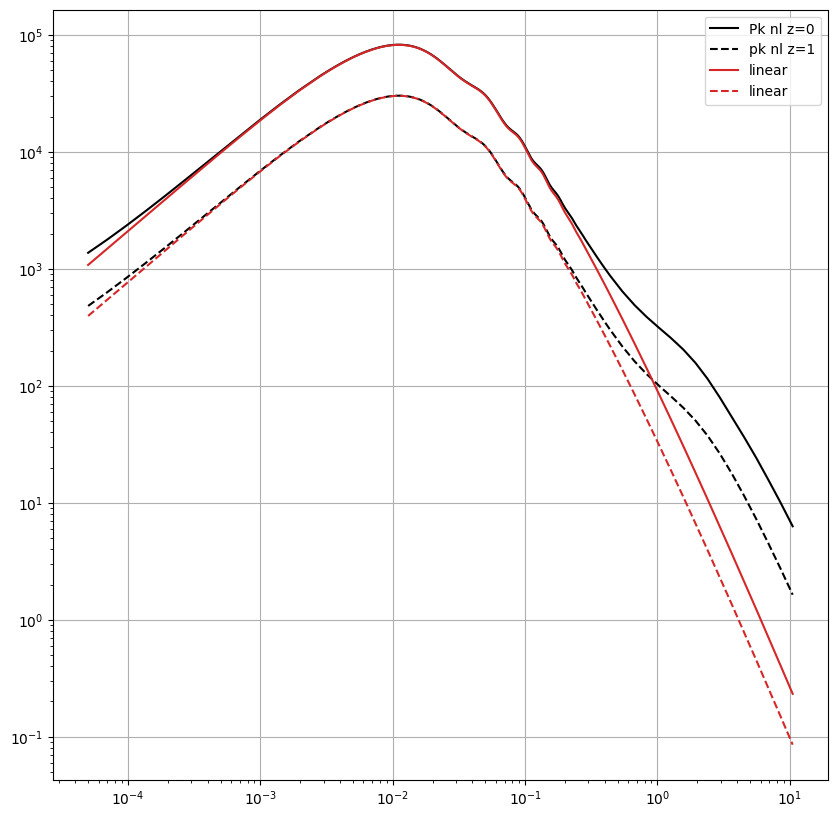

In [10]:
plt.figure(figsize=(10,10))
plt.plot(k, pk_mm[0,:], color='black', label='Pk nl z=0')
plt.plot(k, pk_mm[75,:], color='black', ls='dashed', label='pk nl z=1')
plt.plot(k, Pk_mm_lin[0,:], color='tab:red', label='linear')
plt.plot(k, Pk_mm_lin[75,:], color='tab:red', ls='dashed', label='linear')
plt.loglog()
plt.grid()
plt.legend()